## Read Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("C:\\Users\\Ferdinand\\OneDrive - Institut Teknologi Sepuluh Nopember\\SEMESTER 8\\TA\\GitHub\\Stress-Detection\\ecg\\samples e0103.csv")

In [3]:
time = np.array(data['elapsed time'])[:75250] 
signal = np.array(data['V4'])[:75250]

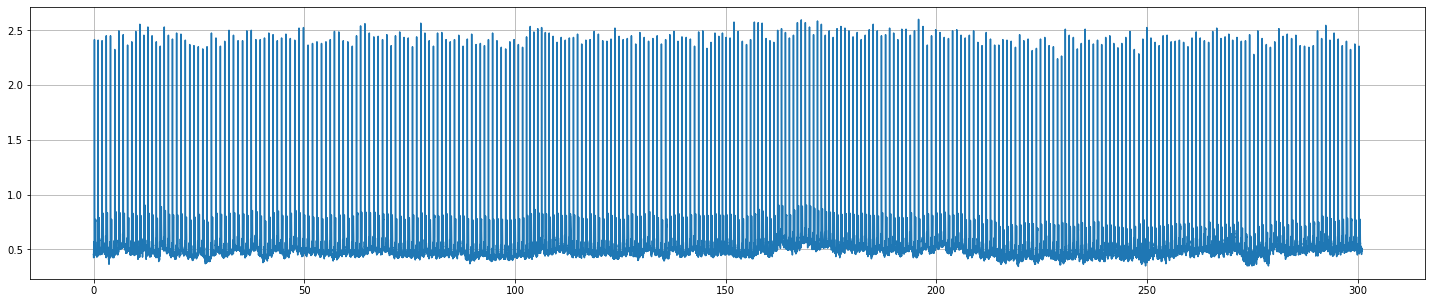

In [4]:
plt.figure(figsize = (25,5))
plt.plot(time, (signal))
plt.grid()

## DWT

In [5]:
import math

In [6]:
# x_fft_p, y_fft_p = process(signal[:25], fs=250)
# x_fft_qrs, y_fft_qrs = process(signal[52:100], fs=250)
# x_fft_t, y_fft_t = process(signal[76:145], fs=250)
# plt.figure(figsize = (25,5))
# # plt.plot(x_fft_p, y_fft_p, x_fft_qrs, y_fft_qrs, x_fft_t, y_fft_t)
# plt.plot(x_fft_qrs, y_fft_qrs)
# plt.legend(['P', 'QRS', 'T'])
# plt.grid()

In [7]:
def dirac(x):
    diracdelta = 1 if x == 0 else 0
  # if x == 0:
  #   diracdelta = 1
  # else:
  #   diracdelta = 0
    return diracdelta

In [8]:
g = [0] * 5
h = [0] * 5
Hw = [0] * len(signal)
Gw = [0] * len(signal)
fs = 250
for n in range (-2, 1):
    h[n] = 1/8*(dirac(n-1)+3*dirac(n)+3*dirac(n+1)+3*dirac(n+2))
    g[n] = -2*(dirac(n)-dirac(n+1))

for i in range (fs):
    reH = 0
    imH = 0
    reG = 0
    imG = 0
    for k in range (-1, 2):
        reG = reG + g[k]*np.cos(k*2*np.pi*i/fs)
        imG = imG - g[k]*np.sin(k*2*np.pi*i/fs)
        reH = reH + h[k]*np.cos(k*2*np.pi*i/fs)
        imH = imH - h[k]*np.sin(k*2*np.pi*i/fs)
    Hw[i] = np.sqrt((reH**2)+(imH**2));
    Gw[i] = np.sqrt((reG**2)+(imG**2));
xx = []
x = int(fs/2)
Q = np.zeros((9,125))
for i in range (x):
    xx.append(i)
    Q[1,i] = Gw[i]
    Q[2,i] = Gw[2*i]*Hw[i]
    Q[3,i] = Gw[4*i]*Hw[2*i]*Hw[i]
    Q[4,i] = Gw[8*i]*Hw[4*i]*Hw[2*i]*Hw[i]
    Q[5,i] = Gw[16*i]*Hw[8*i]*Hw[4*i]*Hw[2*i]*Hw[i]
    Q[6,i] = Gw[32*i]*Hw[16*i]*Hw[8*i]*Hw[4*i]*Hw[2*i]*Hw[i]
    Q[7,i] = Gw[64*i]*Gw[32*i]*Gw[16*i]*Hw[8*i]*Hw[4*i]*Hw[2*i]*Hw[i]
    Q[8,i] = Gw[128*i]*Gw[64*i]*Gw[32*i]*Gw[16*i]*Hw[8*i]*Hw[4*i]*Hw[2*i]*Hw[i]

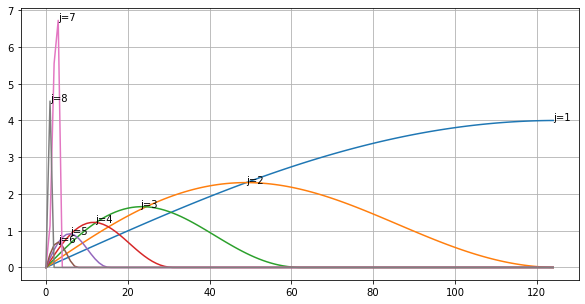

In [9]:
plt.figure(figsize = (10,5))
plt.plot(xx, Q[1], xx, Q[2], xx, Q[3], xx, Q[4], xx, Q[5], xx, Q[6], xx, Q[7], xx, Q[8])
plt.grid()

text = ['j=1', 'j=2', 'j=3', 'j=4', 'j=5', 'j=6', 'j=7', 'j=8']
for i in range(8):
    plt.text(xx[Q[i + 1].argmax()], np.max(Q[i + 1]), text[i])

[-1  0]
[ 2. -2.]


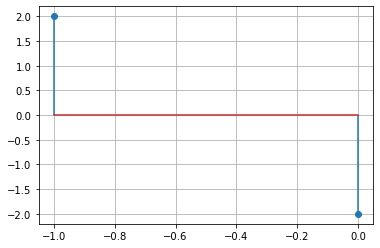

In [10]:
j = 1
k = np.arange(-(round(2**j)+round(2**(j-1))-2), -(-round(2**(j-1))))
print(k)
qj1 = np.zeros((len(k)))
for index, x in enumerate(k):
    qj1[index] = -2*(dirac(x)-dirac(x+1))
print(qj1)

plt.stem(k, qj1)
plt.grid()

[-4 -3 -2 -1  0  1]
[ 0.25  0.75  0.5  -0.5  -0.75 -0.25]


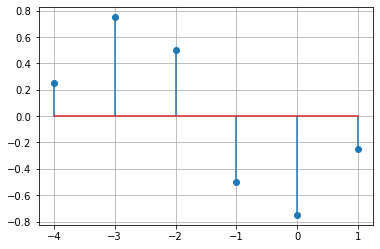

In [11]:
j = 2
k = np.arange(-(round(2**j)+round(2**(j-1))-2), -(-round(2**(j-1))))
print(k)
qj2 = np.zeros((len(k)))
for index, x in enumerate(k):
    qj2[index] = -1/4*(dirac(x-1) + 3*dirac(x) + 2*dirac(x+1) - 2*dirac(x+2) - 3*dirac(x+3) - dirac(x+4))
#     qj2[index] = -1/4*(dirac(x+1) + 3*dirac(x) + 2*dirac(x-1) - 2*dirac(x-2) - 3*dirac(x-3) - dirac(x-4))
print(qj2)

plt.stem(k, qj2)
plt.grid()

[-3 -2 -1  0  1  2  3  4  5  6  7  8  9 10] 14
[-0.03125 -0.09375 -0.1875  -0.3125  -0.34375 -0.28125 -0.125    0.125
  0.28125  0.34375  0.3125   0.1875   0.09375  0.03125]


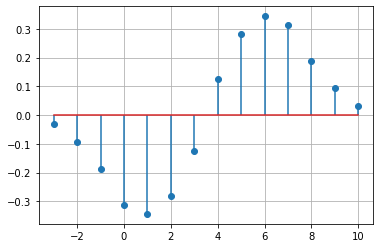

In [12]:
j = 3
# k = np.arange(-(round(2**j)+round(2**(j-1))-2), -(-round(2**(j-1))))
k = np.arange((1-round(2**(j-1))), (round(2**(j))+round(2**(j-1))-2)+ 1)
print(k, len(k))
qj3 = np.zeros((len(k)))
for index, x in enumerate(k):
#     qj3[index] = -1/32*(dirac(x-3) + 3*dirac(x-2) + 6*dirac(x-1) + 10*dirac(x) + 11*dirac(x+1) + 9*dirac(x+2) + 4*dirac(x+3) - 4*dirac(x+4) - 9*dirac(x+5) - 11*dirac(x+6) - 10*dirac(x+7) - 6*dirac(x+8) - 3*dirac(x+9) - dirac(x+10))
    qj3[index] = -1/32*(dirac(x+3) + 3*dirac(x+2) + 6*dirac(x+1) + 10*dirac(x) + 11*dirac(x-1) + 9*dirac(x-2) + 4*dirac(x-3) - 4*dirac(x-4) - 9*dirac(x-5) - 11*dirac(x-6) - 10*dirac(x-7) - 6*dirac(x-8) - 3*dirac(x-9) - dirac(x-10))
print(qj3)

plt.stem(k, qj3)
plt.grid()

In [13]:
def delay(j):
    T = round((2**(j-1))) - 1
    return T

In [14]:
ndata = len(signal)
ndata

75250

In [15]:
w2fb1 = np.zeros(ndata + delay(1))
w2fb2 = np.zeros(ndata + delay(2))
w2fb3 = np.zeros(ndata + delay(3))

Text(0.5, 1.0, 'ECG Signal with Decomposition 1')

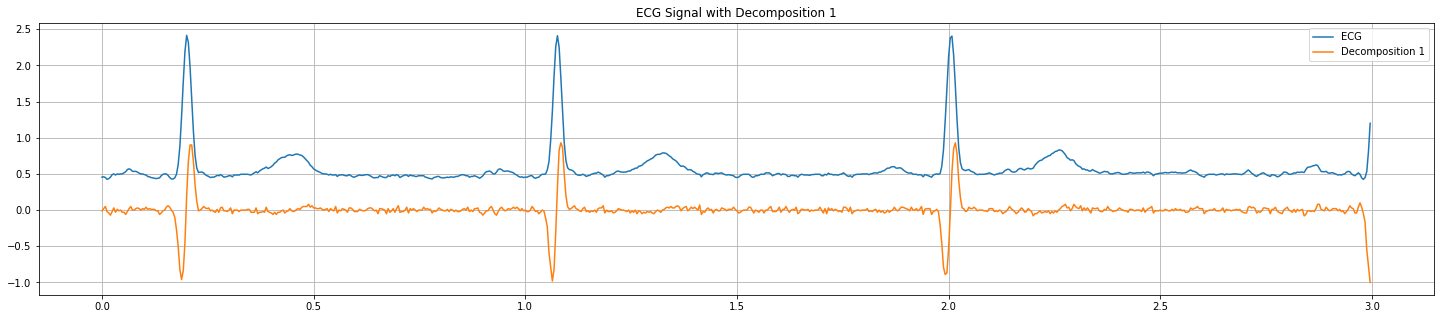

In [16]:
for n in range(ndata - 1):
    w2fb1[n + delay(1)] = 0
    j = 1
    k_temp = np.arange(-(round(2**j)+round(2**(j-1))-2), -(-round(2**(j-1))))
    for x in (k_temp):
        w2fb1[n + delay(1)] += qj1[x] * signal[min(ndata - 1, n - x)]

plt.figure(figsize = (25,5))
plt.plot(time[:750], signal[:750], time[:750], w2fb1[:750])
plt.grid()
plt.legend(['ECG', 'Decomposition 1'])
plt.title('ECG Signal with Decomposition 1')

Text(0.5, 1.0, 'ECG Signal with Decomposition 2')

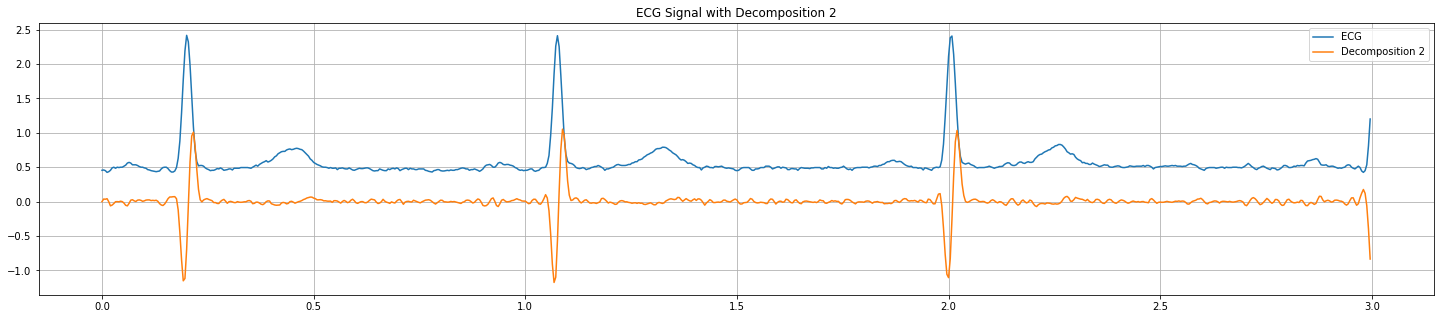

In [17]:
for n in range(ndata - 1):
    w2fb2[n + delay(2)] = 0
    j = 2
    k_temp = np.arange(-(round(2**j)+round(2**(j-1))-2), -(-round(2**(j-1))))
    for x in (k_temp):
        w2fb2[n + delay(2)] += qj2[x] * signal[min(ndata - 1, n - x)]

plt.figure(figsize = (25,5))
plt.plot(time[:750], signal[:750], time[:750], w2fb2[:750])
plt.grid()
plt.legend(['ECG', 'Decomposition 2'])
plt.title('ECG Signal with Decomposition 2')

Text(0.5, 1.0, 'ECG Signal with Decomposition 3')

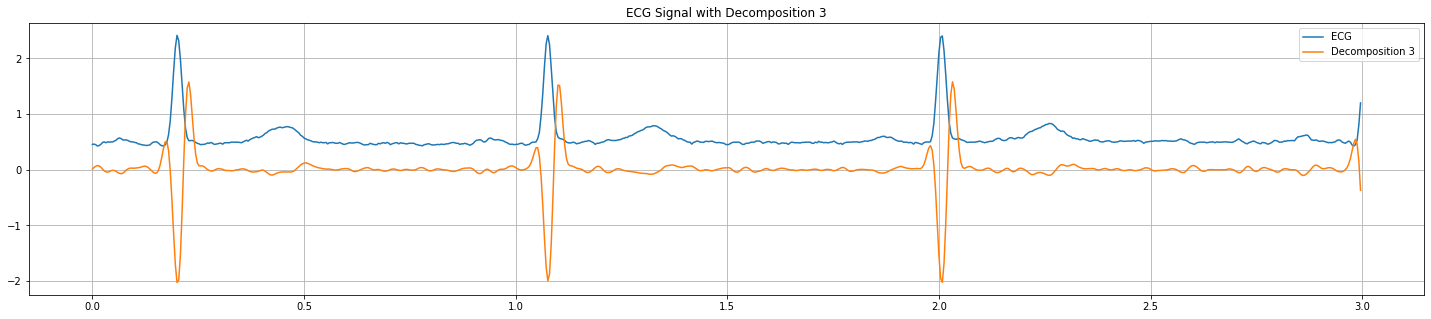

In [18]:
for n in range(ndata - 1):
    w2fb3[n + delay(3)] = 0.0
    j = 3
#     k_temp3 = np.arange(-(round(2**(j))+round(2**(j-1))-2), -(1-round(2**(j-1))) + 1)
    k_temp3 = np.arange((1-round(2**(j-1))), (round(2**(j))+round(2**(j-1))-2)+1)
    for x in (k_temp3):
        w2fb3[n - delay(3)] += qj3[x] * signal[min(ndata - 1, n - x)]

plt.figure(figsize = (25,5))
plt.plot(time[:750], signal[:750], time[:750], w2fb3[:750])
plt.grid()
plt.legend(['ECG', 'Decomposition 3'])
plt.title('ECG Signal with Decomposition 3')

Text(0.5, 1.0, 'ECG Signal with Decomposition 1 - 3')

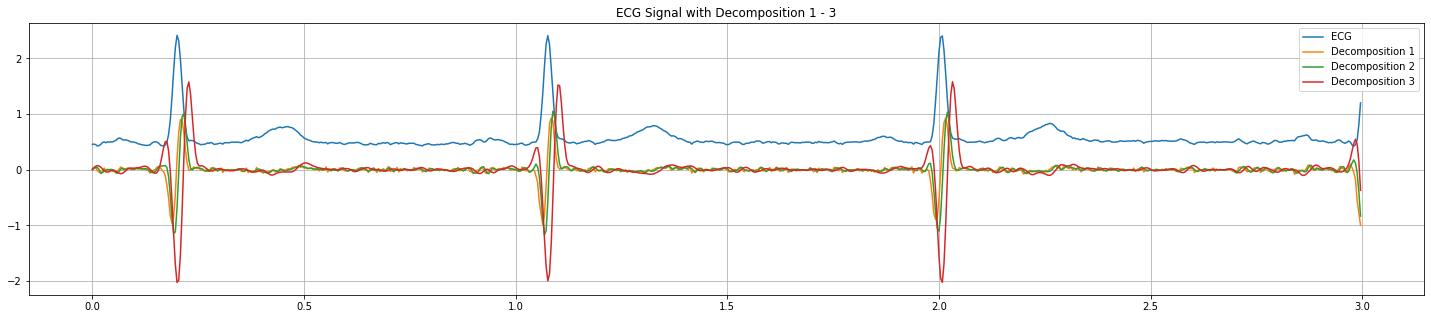

In [19]:
plt.figure(figsize = (25,5))
plt.plot(time[:750], signal[:750], time[:750], w2fb1[:750], time[:750], w2fb2[:750], time[:750], w2fb3[:750])
plt.grid()
plt.legend(['ECG', 'Decomposition 1', 'Decomposition 2', 'Decomposition 3'])
plt.title('ECG Signal with Decomposition 1 - 3')

In [20]:
gradien1 = np.zeros(ndata)
gradien2 = np.zeros(ndata)
gradien3 = np.zeros(ndata)

# hasil1 = np.zeros(ndata)
# hasil2 = np.zeros(ndata)
# hasil3 = np.zeros(ndata)
hasil_qrs = np.zeros(ndata)

In [21]:
for n in range(ndata - 1):
    gradien1[n] = w2fb1[n + 1] - w2fb1[n]
    gradien2[n] = w2fb2[n + 2] - w2fb2[n]
    gradien3[n] = w2fb3[n + 3] - w2fb3[n]
    hasil_qrs[n] = (gradien1[n]>0.2 and gradien2[n]>0.5 and gradien3[n]>0.9)*1

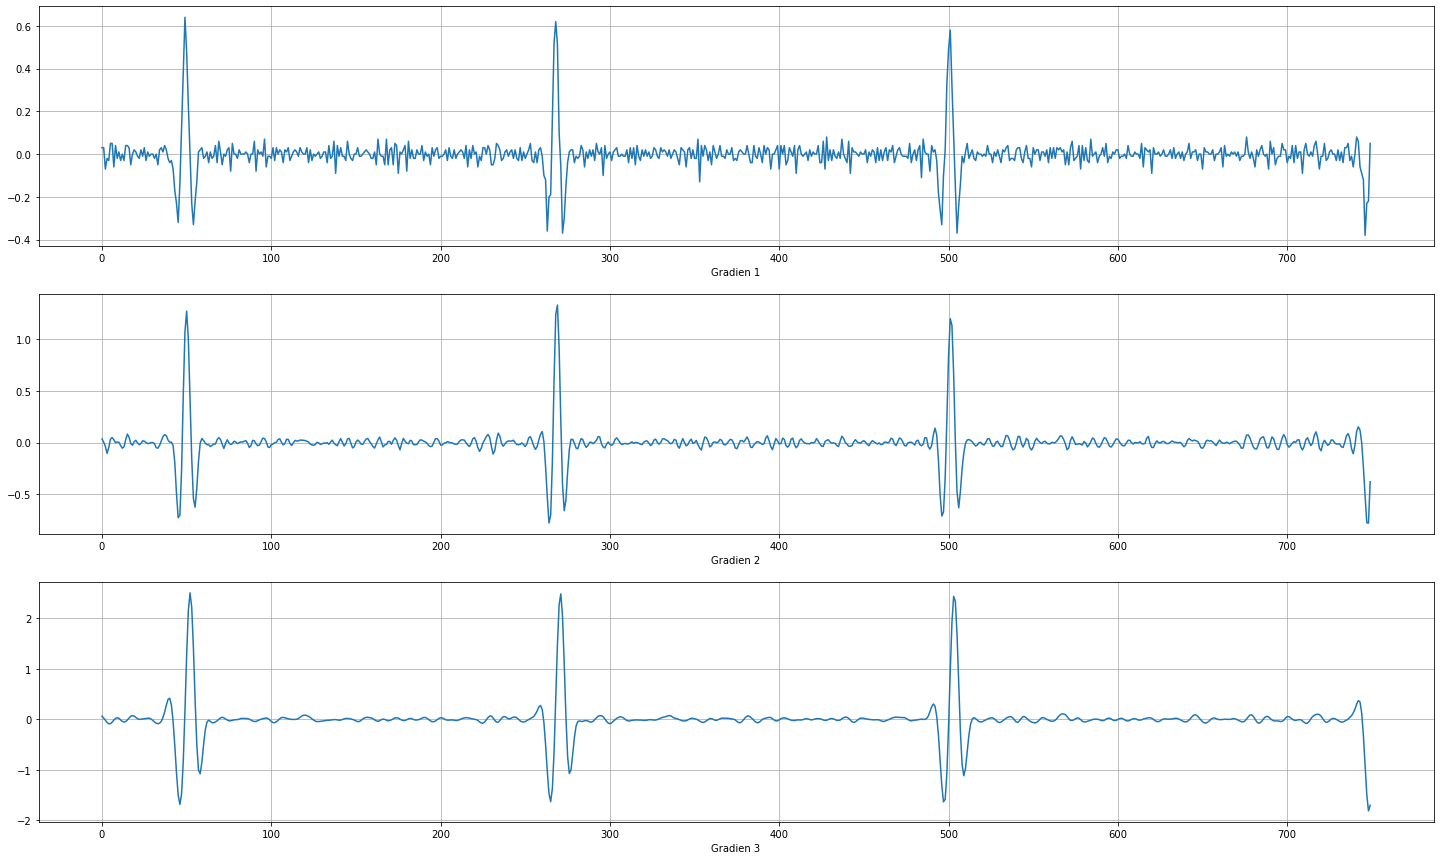

In [22]:
# for n in range(ndata-1):
#     gradien1[n] = w2fb1[n + 1] - w2fb1[n]
#     gradien2[n] = w2fb2[n + 2] - w2fb2[n]
#     gradien3[n] = w2fb3[n + 3] - w2fb3[n]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (25,15))
ax1.plot(gradien1[:750])
ax2.plot(gradien2[:750])
ax3.plot(gradien3[:750])
ax1.set_xlabel('Gradien 1')
ax2.set_xlabel('Gradien 2')
ax3.set_xlabel('Gradien 3')
ax1.grid()
ax2.grid()
ax3.grid()

In [23]:
# for n in range(ndata - 1):
#     if gradien1[n] > 0.2 :
#         hasil1[n] = 1
#     else:
#         hasil1[n] = 0

#     if gradien2[n] > 0.5 :
#         hasil2[n] = 1
#     else:
#         hasil2[n] = 0

#     if gradien3[n] > 0.9 :
#         hasil3[n] = 1
#     else:
#         hasil3[n] = 0

#     hasil_qrs[n] = hasil1[n] and hasil2[n] and hasil3[n]

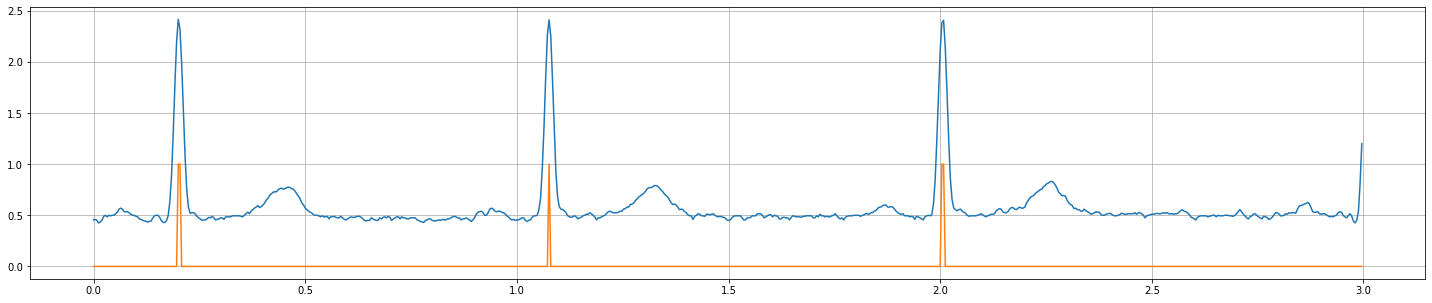

In [24]:
plt.figure(figsize = (25,5))
plt.plot(time[:750], signal[:750], time[:750], hasil_qrs[:750])
plt.grid()

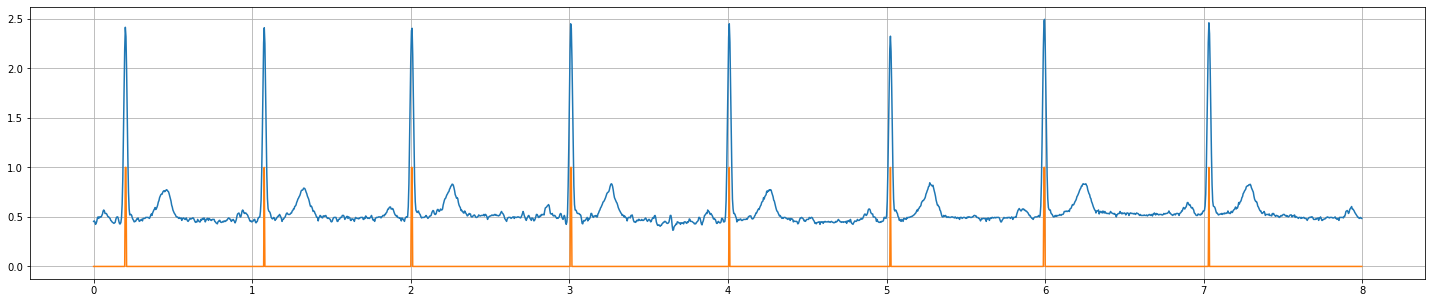

In [25]:
plt.figure(figsize = (25,5))
plt.plot(time[:2000], signal[:2000], time[:2000], hasil_qrs[:2000])
plt.grid()

In [26]:
def rrinterval(tsignal, fs=250):
    t = 1/fs
    k = []
    for i in range(tsignal.size-1):
        if tsignal[i] == 0 and tsignal[i+1] == 1:
            k.append(i)
    
    rri = []
    for i in range(1, len(k)):
        rri.append(k[i]*t - k[i-1]*t)
    
    return np.array(rri)


In [27]:
rri = rrinterval(hasil_qrs)
print(rri[0], rri[1], len(rri))

0.8760000000000001 0.9279999999999999 304


In [28]:
mean_rri = np.mean(rri)
mean_rri

0.9872894736842104

In [29]:
time_sampling = mean_rri
n = np.arange(1, len(rri)+1)
time_rri = n*time_sampling
(1/(time_rri[2] - time_rri[1]))*2

2.0257483274249015

### RR Tachogram

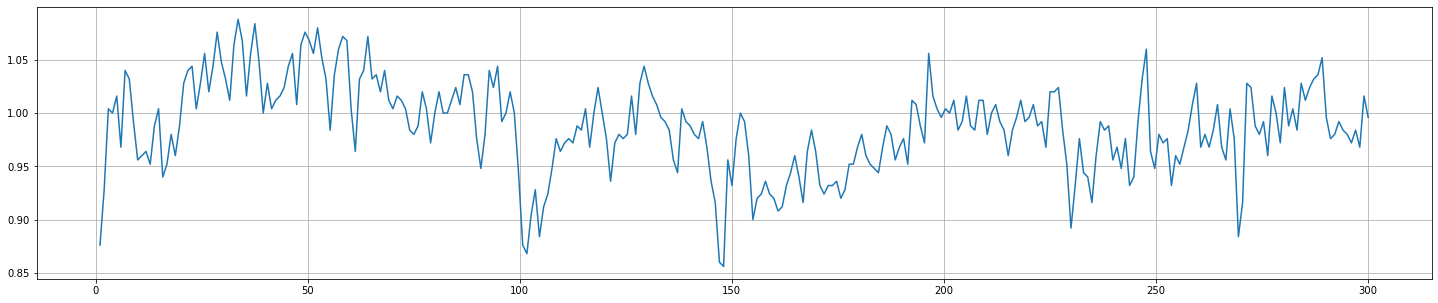

In [30]:
plt.figure(figsize = (25,5))
plt.plot(time_rri, rri)
plt.grid()

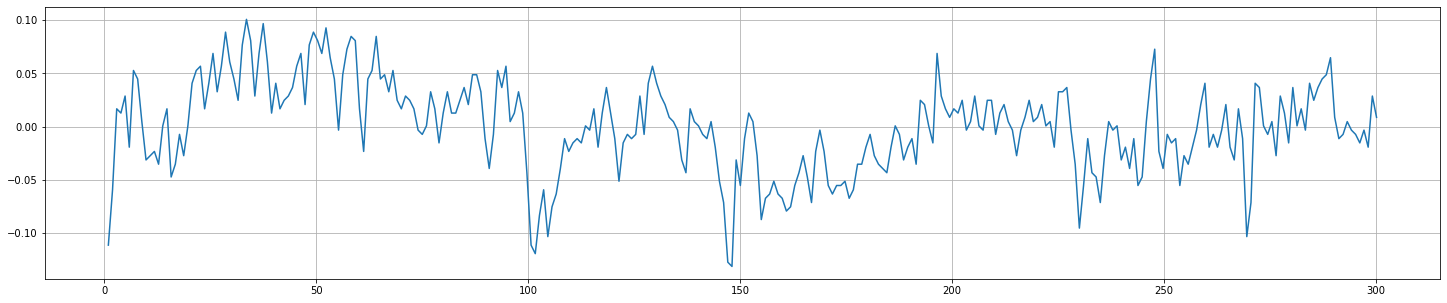

In [31]:
rri_norm = np.zeros(len(rri))
for i in range(len(rri)):
    rri_norm[i] = rri[i] - mean_rri
    
plt.figure(figsize = (25,5))
plt.plot(time_rri, (rri_norm)) # Baseline supaya di 0
plt.grid()

## Time Domain

### RMSSD

In [32]:
def rri_diff(rr):
    rrd = np.zeros(rri.size - 1)

    for i in range(rri.size - 1):
        rrd[i] = abs(rri[i + 1] - rri[i])

    return rrd

In [33]:
def rmssd(rr):
    rrd = rri_diff(rr)
    
    _rmssd = np.sum([x**2 for x in rrd])
    _rmssd = np.sqrt(_rmssd / (rrd.size - 1))
    
    return _rmssd

In [34]:
value_rmssd = rmssd(rri)
print("RMSSD : ", value_rmssd)

RMSSD :  0.03035332771396342


### pNN50

In [35]:
def rri_format(rr):
    if np.max(rr) < 10:
        rr_ = np.asarray(rr, dtype='float64')
        rr_ *= 1000
        return rr_
    return rr

In [36]:
def nnXX(rr, threshold):
    rr = rri_format(rr)
    rrd = rri_diff(rr)
    nnxx = np.sum(i > threshold for i in rrd)
    pnnxx = ((nnxx) / (rrd.size - 1)) * 100
    return nnxx, pnnxx

def nn50(rr):
    return nnXX(rr, 50)

In [37]:
nn50, pnn50 = nn50(rri)
print("NN50 & pNN50 : ",nn50, pnn50)

NN50 & pNN50 :  30 9.933774834437086


C:\Users\FERDIN~1\AppData\Local\Temp/ipykernel_22064/4080439694.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  nnxx = np.sum(i > threshold for i in rrd)


### SDANN

In [38]:
def segmentation(rri, duration=300):
    rri = rri_format(rri)
    max_time = np.sum(rri)
    duration *= 1 # to miliseconds

    if np.sum(rri) > duration:
        segments = []
        limit = int(np.ceil((max_time + duration)/duration))
        index = 0

        for i, _ in enumerate(range(0, limit - 1)):
            current_segment = []
            while(np.sum(current_segment) < duration):
                current_segment.append(rri[index])
                if index < rri.size - 1:
                    index += 1
                else:
                    break
            
            # just in case it's more than the duration
            if (np.sum(current_segment) > duration):
                current_segment = current_segment[:-1]
                index -= 1

            segments.append(list(current_segment))
        
        return segments
    else:
        return np.asarray([])

def std(array, dof=1):
    array = np.asarray(array)
    result = np.sum([(x - np.mean(array))**2 for x in array])
    result = np.sqrt(1. / (array.size - dof) * result)
    return result

In [39]:
def sdann(rr):
    segments = segmentation(rr)
    if len(segments) != 0:
        mean_values = [np.mean(x) for x in segments]
        sdann_ = std(mean_values, 1)
    else:
        sdann_ = -1000
    return sdann_

In [40]:
sdann = sdann(rri)
print("SDANN : ",sdann)

SDANN :  nan


C:\Users\Ferdinand\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Ferdinand\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Non Linear Analysis

### Poincare Plot

Text(0.5, 0, 'RR[n]')

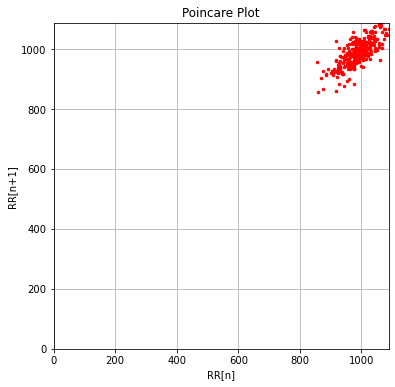

In [41]:
plt.figure(figsize = (6, 6))
plt.xlim(xmin=0,xmax=max(rri))
plt.ylim(ymin=0,ymax=max(rri))
# for n in range(len(rri)):
#     plt.plot(rri[n - 1], rri[n], 'ro', markersize=2.5)
plt.plot(rri[:-1],rri[1:],'ro',markersize=2.5)
plt.grid()
plt.title('Poincare Plot')
plt.ylabel('RR[n+1]')
plt.xlabel('RR[n]')

In [42]:
x1 = np.asarray(rri[:-1])
x2 = np.asarray(rri[1:])

In [43]:
subtract_std = np.zeros(len(rri)-1)
for i in range(len(rri)-1):
    subtract_std[i] = x1[i] - x2[i]
    subtract_std[i] /= np.sqrt(2)
    
add_std = np.zeros(len(rri)-1)
for j in range(len(rri)-1):
    add_std[j] = x1[j] + x2[j]
    add_std[j] /= np.sqrt(2)

In [44]:
sd1 = std(subtract_std)

In [45]:
sd2 = std(add_std)

In [46]:
sd1, sd2

(21.461210783425162, 55.7239669460827)

## Frequency Domain

In [47]:
def FFT(x):
    N = len(x)
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j*np.pi*np.arange(N)/ N)
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X

def process(yy, fs):
    y = []
    for i in range(len(yy)):
        y.append(yy[i])
    leny = len(y)
#     pangkat = math.ceil(math.log(leny, 2))
    sr1 = 2**13
    for i in range (sr1-leny):
        y.append(0)
    
    yfft = FFT(y)
    N = len(yfft)
    n = np.arange(0, N)
    T = N/fs
    xfft = n/T 
    yfft = np.absolute(yfft)
    return xfft[:sr1//2], yfft[:sr1//2]

### Hanning Window

In [48]:
def hann(input_segment):
    n_seg = len(input_segment)
    window = np.zeros(n_seg)
    for i in range(n_seg):
        window[i] = input_segment[i] * (0.5-0.5*np.cos(2*np.pi*i/n_seg))
    return window

In [50]:
import scipy as sp
from scipy import interpolate

In [53]:
rri_n = np.asarray(rri)
fs_resam = 4
t = np.cumsum(rri_n)
t -= t[0]
f_interpol = sp.interpolate.interp1d(t, rri_n, 'cubic')
t_interpol = np.arange(t[0], t[-1], 1000./fs_resam)
rri_interpol = f_interpol(t_interpol)

In [54]:
print(t.max(), len(rri_interpol))

299260.0000000001 1198


In [55]:
nfft = 2**12
if t.max() < 300000:
    nperseg = nfft
else:
    nperseg = 300

In [56]:
print(nperseg)

4096


In [57]:
window = nperseg
shift = int(window/2)
start = np.arange(0, len(rri) + 1)[0:(len(rri_interpol) + 1) - window:shift]
end = np.arange(0, len(rri) + 1)[window:len(rri_interpol) + 1:shift]
print(start, end)
# out_dict = {}
# for x in range(len(start)):
#     hasil_fft=transformer.FFT(rri[start[x]:end[x]])
#     out_dict[x]= transformer.DFT_FFT_magnitude_norm(hasil_fft,250)
# out_dict

[] []


In [146]:
x_fft_segment = [0]*(window + shift)
y_fft_segment = [0]*(window + shift)
for i in range(len(start)):
    x_fft_segment[i], y_fft_segment[i] = process(hann(rri_norm[start[i]:end[i]]), fs=4)

In [147]:
y_fft_segment[0], y_fft_segment[1], y_fft_segment[2], y_fft_segment[3], y_fft_segment[4]

(array([1.65469915, 1.65695879, 1.66369139, ..., 0.03095469, 0.03126826,
        0.03145504]),
 0,
 0,
 0,
 0)

In [148]:
y_fft = [0]*(2**12)
print(len(y_fft))
for i in range(len(start)):
    y_fft += y_fft_segment[i]
y_fft /= len(start)
y_fft

4096


array([1.65469915, 1.65695879, 1.66369139, ..., 0.03095469, 0.03126826,
       0.03145504])

In [149]:
x_fft_segment[0], y_fft

(array([0.00000000e+00, 4.88281250e-04, 9.76562500e-04, ...,
        1.99853516e+00, 1.99902344e+00, 1.99951172e+00]),
 array([1.65469915, 1.65695879, 1.66369139, ..., 0.03095469, 0.03126826,
        0.03145504]))

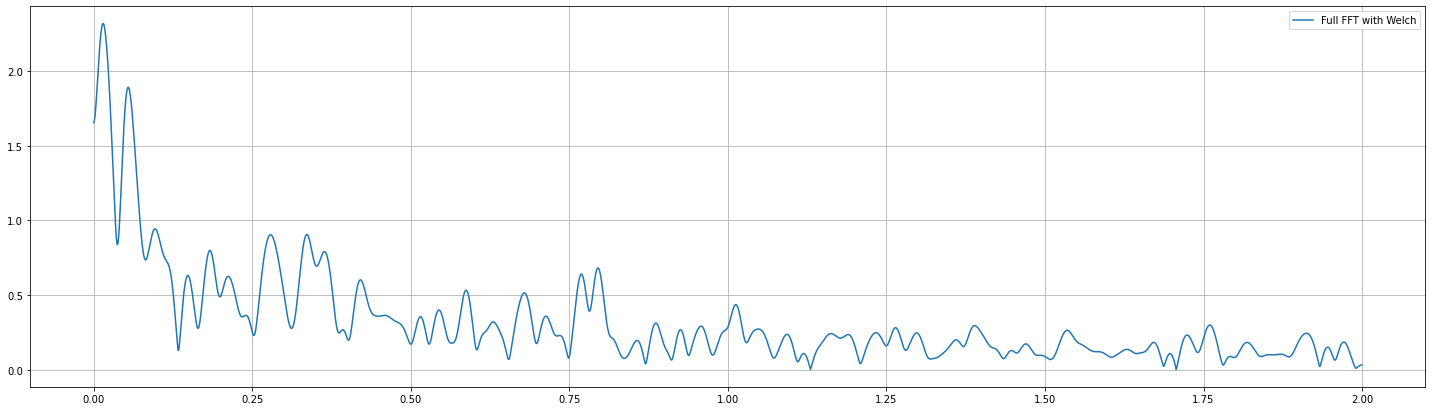

In [150]:
plt.figure(figsize = (25,7))
plt.plot(x_fft_segment[0], y_fft)
plt.legend(['Full FFT with Welch'])
plt.grid()

In [151]:
for i in range(len(x_fft_segment[0])):
    if x_fft_segment[0][i] >= 0.04 and x_fft_segment[0][i - 1] <= 0.04:
        lf_low = i
    if x_fft_segment[0][i] >= 0.15 and x_fft_segment[0][i - 1] <= 0.15:
        lf_high = i
        hf_low = i
    if x_fft_segment[0][i] >= 0.4 and x_fft_segment[0][i - 1] <= 0.4:
        hf_high = i
    if x_fft_segment[0][i] >= 1 and x_fft_segment[0][i - 1] <= 1:
        tp = i
print(lf_low, lf_high+1, x_fft_segment[0][lf_low], x_fft_segment[0][lf_high+1])
print(hf_low, hf_high+1, x_fft_segment[0][hf_low], x_fft_segment[0][hf_high+1])
print(tp+1, x_fft_segment[0][tp+1])

82 309 0.0400390625 0.15087890625
308 821 0.150390625 0.40087890625
2050 1.0009765625


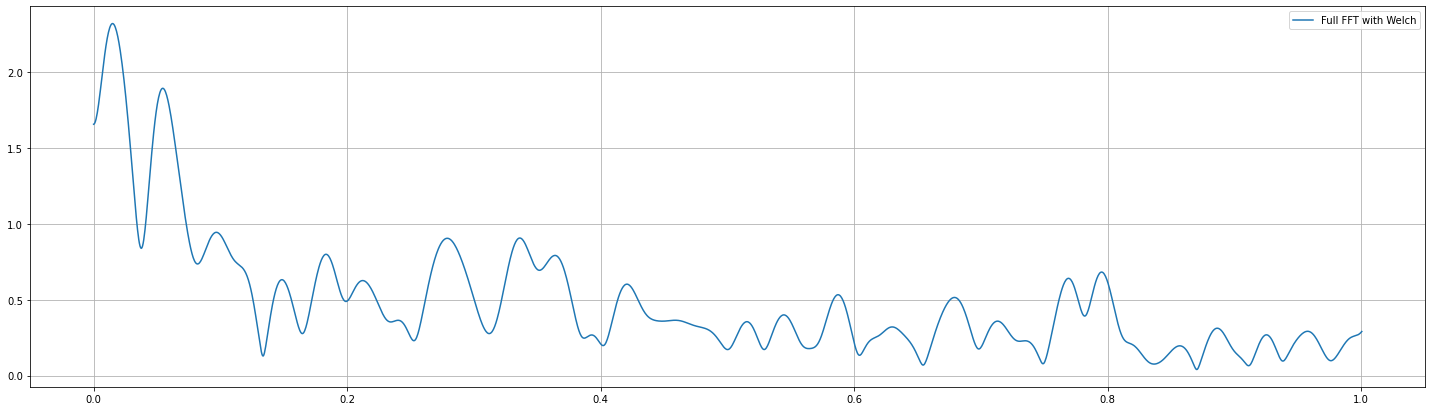

In [152]:
plt.figure(figsize = (25,7))
plt.plot(x_fft_segment[0][:tp+1], y_fft[:tp+1])
plt.legend(['Full FFT with Welch'])
plt.grid()

In [153]:
range_lf = y_fft[lf_low:lf_high+1]
range_hf = y_fft[hf_low:hf_high+1]
range_tp = y_fft[:tp+1]

### LF

In [154]:
LF = np.sum([x for x in range_lf])
LF

210.05880222387518

###  HF

In [155]:
HF = np.sum([x for x in range_hf])
HF

285.35429367437507

### LF/HF

In [156]:
LF/HF

0.7361333152518761

### Total Power

In [157]:
TP = np.sum([x for x in range_tp])
TP

989.8577097331888

In [112]:
x_fft_full, y_fft_full = process(hann(rri_norm), fs=4)

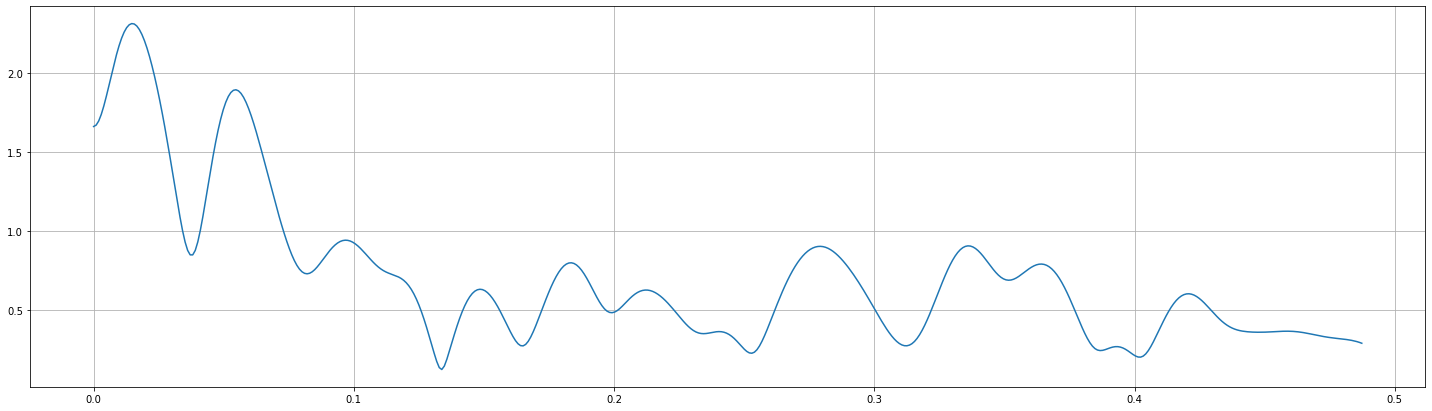

In [115]:
plt.figure(figsize = (25,7))
plt.plot(x_fft_full[:500], y_fft_full[:500])
plt.grid()

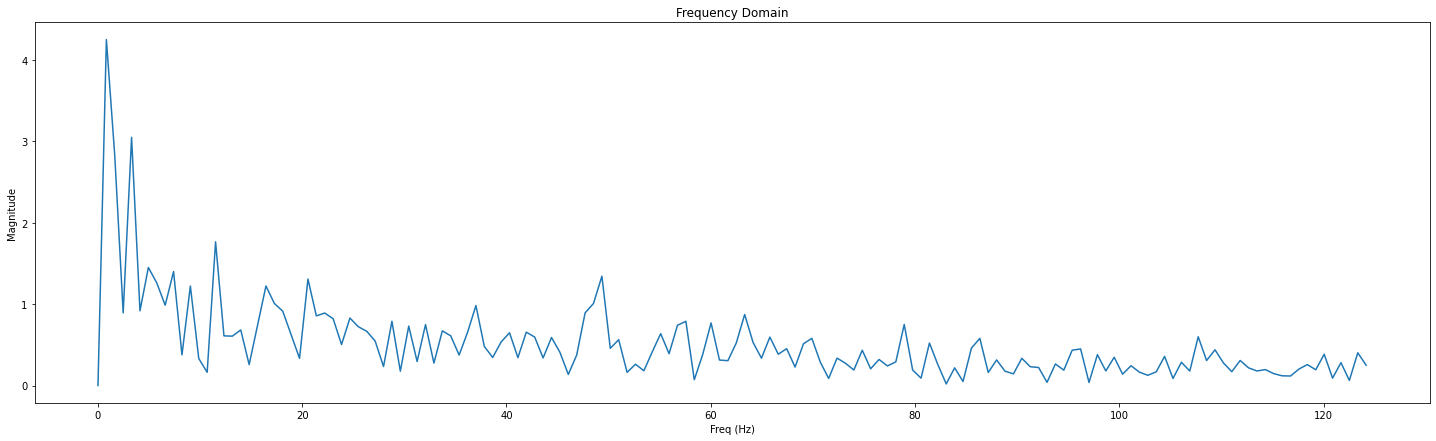

In [65]:
ndat = len(rri_norm)
X_real = np.zeros(ndat)
X_imaj = np.zeros(ndat)
MagDFT = np.zeros(ndat) 

# DFT FORMULA
for k in range(ndat):
    for n in range(ndat):
        X_real[k] += rri_norm[n]*np.cos(2*np.pi*k*n/ndat)
        X_imaj[k] += -rri_norm[n]*np.sin(2*np.pi*k*n/ndat)
    MagDFT[k] = np.sqrt(np.square(X_real[k]) + np.square(X_imaj[k])) 
    
n = np.arange(0,ndat,1,dtype=int)
k = np.arange(0,np.ceil(ndat/2),1,dtype=int)  

plt.figure(figsize=((25, 7)))
plt.plot(k*fs/ndat, MagDFT[k])
plt.xlabel("Freq (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Domain")
plt.show()